In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [169]:
data = pd.read_csv('../data/sierraleone-bumbuna.csv')

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [140]:
data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [141]:
data.isnull().sum()


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [127]:
#columns with missing value above 5%
threshold = 5
null_columns = data.isnull().sum()
total_row = len(data)
null_percentage = (null_columns/total_row)*100;
missing_columns = data.columns[null_percentage > threshold]
print('columns above the threshold')
missing_columns.to_list()

columns above the threshold


['Comments']

In [ ]:
#removing column comments b/c has 100% missing value
df_copy = data.copy()
#cap RH % from 0 to 100%




,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4


In [129]:
#changing timestamp to datetime from object
df_copy['Timestamp'] = pd.to_datetime(data['Timestamp'])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [ ]:
#replacing incorrect entries with nan this will remove bad data from calculations
target_cols = [ 'GHI', 'DNI', 'DHI', 'ModA', 'ModB','WS', 'WSgust']


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,264465.000000,259248.000000,262472.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,406.239777,236.240484,232.837959,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,305.063927,261.871060,149.104425,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,132.800000,1.200000,113.600000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,359.500000,115.300000,225.000000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,654.400000,461.500000,337.400000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [ ]:
def find_and_replace_outliers_with_median(df, cols, iqr_multiplier=1.5):
    """
    Finds outliers in specified columns using the IQR method and replaces them
    with the median of their respective columns.

    Args:
        df (pd.DataFrame): The input pandas DataFrame.
        cols (list): A list of column names to check for outliers and replace.
        iqr_multiplier (float, optional): The multiplier for the IQR to define
                                           the outlier bounds. Defaults to 1.5
                                           (standard for box plots).

    Returns:
        pd.DataFrame: A new DataFrame with outliers replaced by the median.
                      Returns a copy, the original DataFrame is not modified.
    """
    df_cleaned = df.copy() # Create a copy to avoid modifying the original DataFrame

    print(f"Processing columns: {cols}")

    for col in cols:
        if col not in df.columns:
            print(f"Warning: Column '{col}' not found in DataFrame. Skipping.")
            continue

        # Ensure the column is numeric, as IQR and median are for numerical data
        if not pd.api.types.is_numeric_dtype(df_cleaned[col]):
             print(f"Warning: Column '{col}' is not numeric. Skipping outlier detection/replacement.")
             continue

        # Calculate Q1, Q3, and IQR for the current column
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outlier detection
        lower_bound = Q1 - iqr_multiplier * IQR
        upper_bound = Q3 + iqr_multiplier * IQR

        # Identify outliers in the current column
        # Create a boolean mask: True for values outside the bounds
        outlier_mask = (df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)

        # Get the indices of the outliers for this specific column
        outlier_indices_col = df_cleaned.index[outlier_mask]

        # Check if any outliers were found in this column
        if len(outlier_indices_col) == 0:
            print(f"No outliers found in column '{col}' using IQR multiplier {iqr_multiplier}.")
            continue

        print(f"Found {len(outlier_indices_col)} outliers in column '{col}'.")
        # print(f"Outlier indices in '{col}': {outlier_indices_col.tolist()}") # Uncomment to see indices

        # Calculate the median for the current column
        # Note: This calculates the median including the outliers in the original data.
        # If you prefer to calculate the median *excluding* outliers, you would
        # filter the column before calculating the median:
        # median_value = df_cleaned.loc[~outlier_mask, col].median()
        median_value = df_cleaned[col].median()

        print(f"Median value for '{col}' (used for replacement): {median_value}")

        # Replace the outlier values with the calculated median
        df_cleaned.loc[outlier_indices_col, col] = median_value

        print(f"Outliers in column '{col}' replaced with median.")

    return df_cleaned

Processing columns: ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'Tamb']
Found 16684 outliers in column 'GHI'.
Median value for 'GHI' (used for replacement): 0.3
Outliers in column 'GHI' replaced with median.
Found 101770 outliers in column 'DNI'.
Median value for 'DNI' (used for replacement): 0.0
Outliers in column 'DNI' replaced with median.
Found 4842 outliers in column 'DHI'.
Median value for 'DHI' (used for replacement): 0.0
Outliers in column 'DHI' replaced with median.
Found 21017 outliers in column 'ModA'.
Median value for 'ModA' (used for replacement): 3.6
Outliers in column 'ModA' replaced with median.
Found 20613 outliers in column 'ModB'.
Median value for 'ModB' (used for replacement): 3.4
Outliers in column 'ModB' replaced with median.
Found 3169 outliers in column 'WS'.
Median value for 'WS' (used for replacement): 0.8
Outliers in column 'WS' replaced with median.
Found 3665 outliers in column 'WSgust'.
Median value for 'WSgust' (used for replacement): 1.6
Outlie

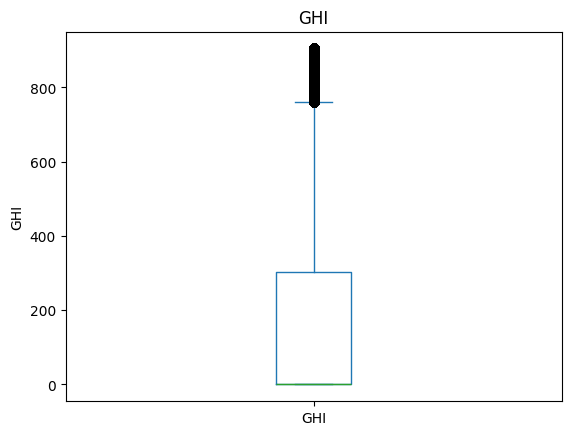

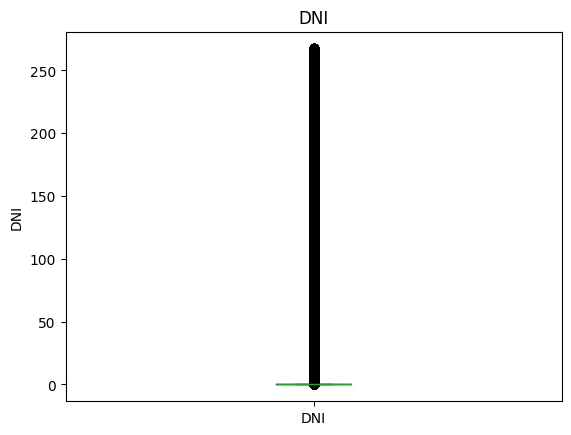

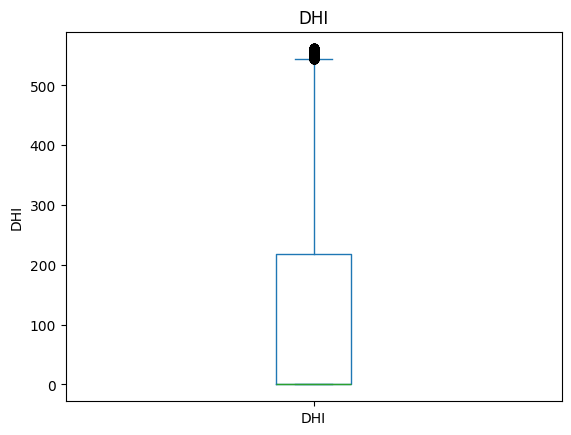

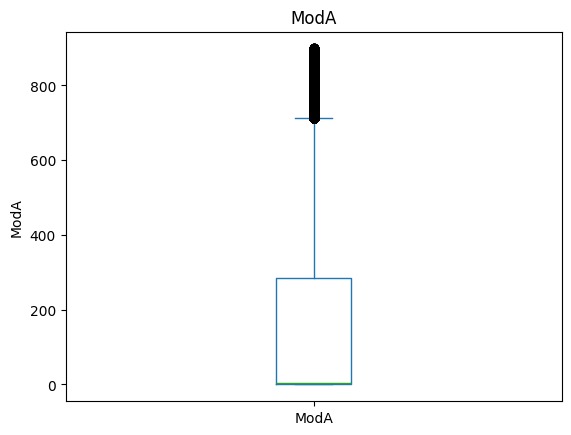

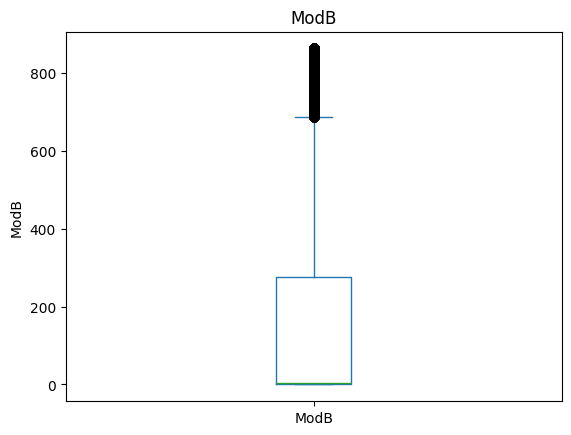

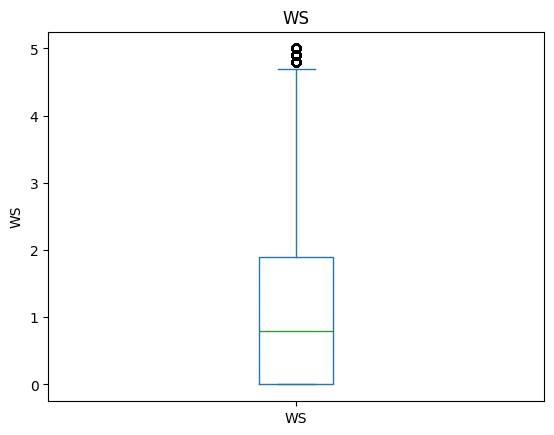

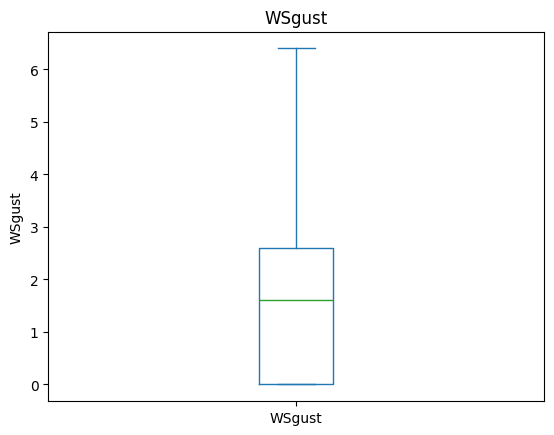

In [171]:
def clean_data(df:pd.DataFrame,cols:list)-> pd.DataFrame:
    clean_data = df.drop(columns=['Comments']).ffill()
    for col in cols:
        clean_data[col]=clean_data[col].clip(lower=0)
    clean_data['RH'].clip(0, 100)
    clean_data = find_and_replace_outliers_with_median(clean_data, cols + ['Tamb'])
    
    return clean_data.reset_index(drop=True)

cleaned_data = clean_data(df_copy,target_cols)
for col in target_cols:
    cleaned_data[col].plot(kind='box')
    plt.title(col)
    plt.ylabel(col)
    plt.show()
print("="*100)


In [172]:
def data_quality_report(df: pd.DataFrame) -> pd.DataFrame:
    """Generate comprehensive data quality report"""
    report = pd.DataFrame({
        'Missing Values': df.isna().sum(),
        'Zero Values': (df == 0).sum(),
        'Negative Values': (df.select_dtypes(include=np.number) < 0).sum()
    })

    # Value range checks
    ranges = {
        'GHI': (0, 1500),
        'RH': (0, 100),
        'Tamb': (-20, 60)
    }
    for col, (min_val, max_val) in ranges.items():
        report.loc[col, 'Out of Range'] = ((df[col] < min_val) | (df[col] > max_val)).sum()

    return report

report = data_quality_report(cleaned_data)
print(report)


               Missing Values  Zero Values  Negative Values  Out of Range
BP                          0            0              0.0           NaN
Cleaning                    0       525092              0.0           NaN
DHI                         0       268326              0.0           NaN
DNI                         0       395668              0.0           NaN
GHI                         0       261771              0.0           0.0
ModA                        0       246580              0.0           NaN
ModB                        0       246940              0.0           NaN
Precipitation               0       513531              0.0           NaN
RH                          0            0              0.0           0.0
TModA                       0            0              0.0           NaN
TModB                       0            0              0.0           NaN
Tamb                        0            0              0.0           0.0
Timestamp                   0         